# Implementar 2: Binarización local, método Bernsen

Implementar para una ventana de 3x3, 5x5 o 7x7.

Contraste: Máximo-Mínimo

gris_medio: Media

In [1]:
%matplotlib inline

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [2]:
def divide_in_tiles(image, tile_size):
    tiles = []
    image_height, image_width = image.shape
    rows = np.ceil(image_height / tile_size).astype(int)
    cols = np.ceil(image_width/ tile_size).astype(int)

    for i in range(rows):
        top = i * tile_size
        bottom = min(top + tile_size - 1, image_height - 1)
        for j in range(cols):
            left = j * tile_size
            right = min(left + tile_size - 1, image_width - 1)
            tiles.append(image[top:bottom, left:right])

    return tiles, rows, cols

In [3]:
def generate_from_tiles(tiles, rows, cols):
    image_rows = []
    for i in range(rows):
        image_row = tiles[i * cols]
        for j in range(1,cols):
            image_row = np.hstack((image_row, tiles[(i * cols) + j]))
        image_rows.append(image_row)

    return np.vstack(image_rows)

In [4]:
#if(contraste_local < contraste_referencia)
#  pixel=(gris_medio >= 128)? objeto:background
#else
#  pixel=(pixel >= gris_medio)? objeto:background

def bernsen(tiles, contrast):
    for tile in tiles:
        if tile.size != 0:
            local_contrast = np.max(tile) - np.min(tile)
            mean = np.mean(tile)
            for i in range(tile.shape[0]):
                for j in range(tile.shape[1]):
                    if local_contrast < contrast:
                        if mean >= 128:
                            tile[i, j] = 255
                        else:
                            tile[i, j] = 0
                    else:
                        if tile[i, j] >= mean:
                            tile[i, j] = 255
                        else:
                            tile[i, j] = 0

In [5]:
original_image = cv.imread("Sombreado.png", cv.IMREAD_GRAYSCALE)
window_sizes = (3, 5, 7)
contrast = 2

Original


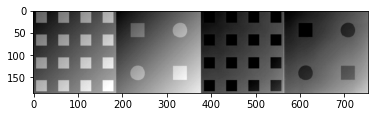

Binarized - Bernsen 3X3


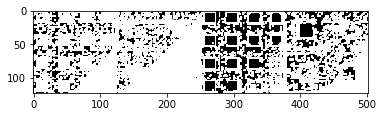

Binarized - Bernsen 5X5


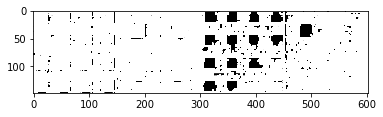

Binarized - Bernsen 7X7


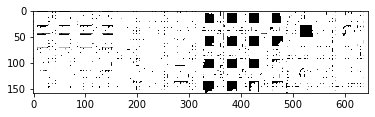

In [6]:
print("Original")
plt.imshow(original_image, cmap='gray', vmin=0, vmax=255)
plt.show()

for window_size in window_sizes:
    tiles, rows, cols = divide_in_tiles(original_image.copy(), window_size)
    bernsen(tiles, contrast)
    binarized_image = generate_from_tiles(tiles, rows, cols)
    print("Binarized - Bernsen {0}X{0}".format(window_size))
    plt.figure(window_size)
    plt.imshow(binarized_image, cmap='gray', vmin=0, vmax=1)
    plt.show()
